In [111]:
# Tensorflow
import tensorflow as tf
from tensorflow.keras.layers import Layer, Input, InputLayer, Conv2D, Flatten, Dense, Reshape, Conv2DTranspose

# Random generator
import numpy as np

# Display of the results
import matplotlib.pyplot as plt

# Better display of the training
from IPython.display import clear_output
from tqdm import tqdm

print(tf.executing_eagerly())

dataset_name = 'Boston housing' # 'MNIST' or 'CIFAR-10' or 'Fashion MNIST' or 'Boston housing'

True


In [112]:
mnist = tf.keras.datasets.mnist
(train_images_mnist, train_labels_mnist), (test_images_mnist, test_labels_mnist) = mnist.load_data()

cifar10 = tf.keras.datasets.cifar10
(train_images_cifar10, train_labels_cifar10), (test_images_cifar10, test_labels_cifar10) = cifar10.load_data()

fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images_fashion_mnist, train_labels_fashion_mnist), (test_images_fashion_mnist, test_labels_fashion_mnist) = fashion_mnist.load_data()

boston_housing = tf.keras.datasets.boston_housing
(train_data_boston_housing, train_targets_boston_housing), (test_data_boston_housing, test_targets_boston_housing) = boston_housing.load_data()

In [113]:
mnist_training_parameters = {'dataset': train_images_mnist / 255.0,
                             'learning_rate': 0.0005,
                             'epochs': 1000,
                             'batch_size': 200}

cifar10_training_parameters = {'dataset': train_images_cifar10 / 255.0,
                               'learning_rate': 0.000005,
                               'epochs': 1000,
                               'batch_size': 200}

fashion_mnist_training_parameters = {'dataset': train_images_fashion_mnist / 255.0,
                                     'learning_rate': 0.0005,
                                     'epochs': 1000,
                                     'batch_size': 200}

boston_housing_training_parameters = {'dataset': train_data_boston_housing,
                                      'learning_rate': 0.0005,
                                      'epochs': 1000,
                                      'batch_size': 200}

In [114]:
mnist_parameters = {'input_dim': (28,28,1),
                    '1D data': False,
                    'latent_dim': 12}

cifar10_parameters = {'input_dim': train_images_cifar10[0].shape,
                      '1D data': False,
                      'latent_dim': 70}

fashion_mnist_parameters = {'input_dim': (28,28,1),
                            '1D data': False,
                            'latent_dim': 12}

boston_housing_parameters = {'input_dim': (train_data_boston_housing[0].shape)[0],
                             '1D data': True,
                             'latent_dim': 3}

In [115]:
# MNIST architecture

mnist_encoder = tf.keras.Sequential([
                InputLayer(input_shape = mnist_parameters['input_dim']),
                Conv2D(32, (3, 3), activation='relu'),
                Conv2D(64, (3, 3), activation='relu'),
                Flatten(),
                Dense(128, activation='relu'),
                Dense(mnist_parameters['latent_dim'], activation=None)
            ])

mnist_decoder = tf.keras.Sequential([
                InputLayer(input_shape = mnist_parameters['latent_dim']),
                Dense(256, activation='relu'),
                Dense(1024, activation='relu'),
                Dense(8*8*8, activation='relu'),
                Reshape((8,8,8)),
                Conv2DTranspose(16, (8, 8), activation='relu'),
                Conv2DTranspose(4, (8, 8), activation='relu'),
                Conv2DTranspose(1, (7, 7), activation='sigmoid')
            ])

print(f"MNIST: input_shape {mnist_parameters['input_dim']} and decoder.output_shape {mnist_decoder.output_shape}")

mnist_parameters['encoder'] = mnist_encoder
mnist_parameters['decoder'] = mnist_decoder

# CIFAR-10 architecture

cifar10_encoder = tf.keras.Sequential([
                InputLayer(input_shape = cifar10_parameters['input_dim']),
                Conv2D(3, (2, 2), activation='relu'),
                Conv2D(32, (2, 2), strides=(2,2), activation='relu'),
                Conv2D(32, (3, 3), activation='relu'),
                Conv2D(32, (3, 3), activation='relu'),
                Flatten(),
                Dense(128, activation='relu'),
                Dense(cifar10_parameters['latent_dim'], activation=None)
            ])

cifar10_decoder = tf.keras.Sequential([
                InputLayer(input_shape = cifar10_parameters['latent_dim']),
                Dense(128, activation='relu'),
                Dense(16*16*32, activation='relu'),
                Reshape((16,16,32)),
                Conv2DTranspose(32, (2, 2), padding = 'same', activation='relu'),
                Conv2DTranspose(32, (2, 2), padding = 'same', activation='relu'),
                Conv2DTranspose(32, (3, 3), strides = (2,2), activation='relu'),
                Conv2D(3, (2, 2), activation='sigmoid')
            ])

print(f"CIFAR-10: input_shape {cifar10_parameters['input_dim']} and decoder.output_shape {cifar10_decoder.output_shape}")

cifar10_parameters['encoder'] = cifar10_encoder
cifar10_parameters['decoder'] = cifar10_decoder

# Fashion-MNIST architecture

fashion_mnist_encoder = tf.keras.Sequential([
                InputLayer(input_shape = fashion_mnist_parameters['input_dim']),
                Conv2D(32, (3, 3), activation='relu'),
                Conv2D(64, (3, 3), activation='relu'),
                Flatten(),
                Dense(128, activation='relu'),
                Dense(fashion_mnist_parameters['latent_dim'], activation=None)
            ])

fashion_mnist_decoder = tf.keras.Sequential([
                InputLayer(input_shape = fashion_mnist_parameters['latent_dim']),
                Dense(256, activation='relu'),
                Dense(1024, activation='relu'),
                Dense(8*8*8, activation='relu'),
                Reshape((8,8,8)),
                Conv2DTranspose(16, (8, 8), activation='relu'),
                Conv2DTranspose(4, (8, 8), activation='relu'),
                Conv2DTranspose(1, (7, 7), activation='sigmoid')
            ])

print(f"Fashion MNIST: input_shape {fashion_mnist_parameters['input_dim']} and decoder.output_shape {fashion_mnist_decoder.output_shape}")

fashion_mnist_parameters['encoder'] = fashion_mnist_encoder
fashion_mnist_parameters['decoder'] = fashion_mnist_decoder

# Boston housing architecture

boston_housing_encoder = tf.keras.Sequential([
                InputLayer(input_shape = boston_housing_parameters['input_dim']),
                Dense(256, activation='relu'),
                Dense(256, activation='relu'),
                Dense(256, activation='relu'),
                Dense(boston_housing_parameters['latent_dim'], activation=None)
            ])

boston_housing_decoder = tf.keras.Sequential([
                InputLayer(input_shape = boston_housing_parameters['latent_dim']),
                Dense(256, activation='relu'),
                Dense(256, activation='relu'),
                Dense(256, activation='relu'),
                Dense(boston_housing_parameters['input_dim'], activation=None)
            ])

print(f"Boston housing: input_shape {boston_housing_parameters['input_dim']} and decoder.output_shape {boston_housing_decoder.output_shape}")

boston_housing_parameters['encoder'] = boston_housing_encoder
boston_housing_parameters['decoder'] = boston_housing_decoder

MNIST: input_shape (28, 28, 1) and decoder.output_shape (None, 28, 28, 1)
CIFAR-10: input_shape (32, 32, 3) and decoder.output_shape (None, 32, 32, 3)
Fashion MNIST: input_shape (28, 28, 1) and decoder.output_shape (None, 28, 28, 1)
Boston housing: input_shape 13 and decoder.output_shape (None, 13)


In [116]:
parameters = {'MNIST': mnist_parameters,
              'CIFAR-10': cifar10_parameters,
              'Fashion MNIST': fashion_mnist_parameters,
              'Boston housing': boston_housing_parameters}[dataset_name]

training_parameters = {'MNIST': mnist_training_parameters,
                       'CIFAR-10': cifar10_training_parameters,
                       'Fashion MNIST': fashion_mnist_training_parameters,
                       'Boston housing': boston_housing_training_parameters}[dataset_name]

In [117]:
class VAE_Huber_energy:

    def __init__(self, latent_dim, encoder, decoder, optimizer = None):

        self.latent_dim = latent_dim

        self.encoder = encoder

        self.decoder = decoder

        if optimizer is None:
            self.optimizer = tf.compat.v1.train.AdamOptimizer(
                learning_rate=0.0005,
                beta1=0.9,
                beta2=0.999,
                epsilon=1e-08,
                use_locking=False,
                name='Adam'
            )
        else:
            self.optimizer = optimizer

    def RS_distance_to_N01(self, Z):
        Nf = tf.stop_gradient(tf.cast(tf.shape(Z)[0], tf.float32))#batch size as float
        Df = tf.stop_gradient(tf.cast(tf.shape(Z)[1], tf.float32))#dimension as float

        # Term 1: c0 and c1
        f0 = tf.stop_gradient((tf.sqrt(2.)-1.)*tf.exp(tf.math.lgamma(Df/2.0+0.5)-tf.math.lgamma(Df/2.0)))
        ddf0 = tf.stop_gradient(tf.exp(tf.math.lgamma(.5+Df/2.)-tf.math.lgamma(1.+Df/2.))/tf.sqrt(2.))

        c0 = tf.stop_gradient(f0 - 1./ddf0)
        c1 = tf.stop_gradient(1/(ddf0**2))

        # Term 2
        term2 = tf.reduce_mean(tf.sqrt(tf.square(tf.math.reduce_euclidean_norm(Z, axis=1)) + c1))

        # Term 3
        _1 = tf.tile(tf.expand_dims(Z, 2), [1,1,Nf])
        _2 = tf.transpose(_1, perm = [2,1,0])
        _3 = _1 - _2
        _4 = tf.reduce_sum(tf.square(_3), axis = 1)
        _5 = _4 + tf.eye(Nf)
        eps = 1e-4
        _6 = tf.sqrt(_5 + eps)
        term3 = tf.reduce_mean(_6)/2 + tf.stop_gradient(tf.sqrt(1 + eps)/(2*Nf))

        RS_loss = c0 + term2 - term3
        return RS_loss

    def train(self, data, epochs = 100, batch_size = 100):
        rng = np.random.default_rng()
        epoch = 0

        losses = []

        for epoch in tqdm(range(epochs)):

            batch = rng.integers(low = 0, high = len(data), size = batch_size)
            batch_input = data[batch]

            with tf.GradientTape() as tape:
                encoded_batch = self.encoder(batch_input)
                decoded_batch = self.decoder(encoded_batch)

                flatten_input = tf.cast(tf.reshape(batch_input, [batch_size, -1]), 'float32')
                flatten_output = tf.reshape(decoded_batch, [batch_size, -1])

                _1 = flatten_input - flatten_output
                _2 = tf.square(_1)
                _3 = tf.reduce_sum(_2, axis=1)

                rec_term = tf.cast(tf.reduce_mean(_3), dtype = 'float32')

                dist_to_N01_term = self.RS_distance_to_N01(encoded_batch)
                lambda_factor = 100.0

                cost_function = rec_term + lambda_factor * dist_to_N01_term
                losses.append(cost_function)

                gradients = tape.gradient(cost_function, self.encoder.trainable_weights + self.decoder.trainable_weights)
                self.optimizer.apply_gradients(zip(gradients, self.encoder.trainable_weights + self.decoder.trainable_weights))

            epoch += 1
            if epoch % 10 == 0:
                print(f"\nEpoch {epoch}, Reconstruction Error: {rec_term.numpy()}, RS Distance: {dist_to_N01_term.numpy()}")
                clear_output(wait=True)
                plt.figure(figsize=(10, 5))
                plt.plot(losses, label='Train Loss')
                plt.title('Loss evolution during the training')
                plt.xlabel('Epoch')
                plt.ylabel('Loss')
                plt.legend()
                plt.grid(True)
                plt.show()

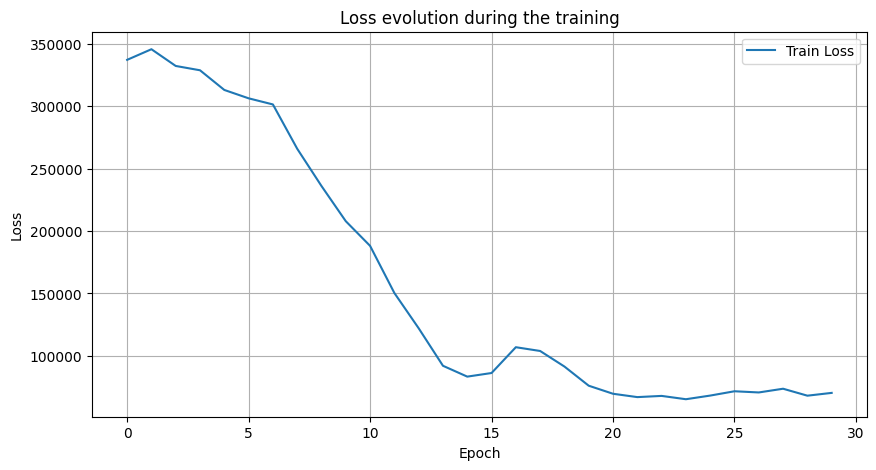

100%|██████████| 30/30 [00:02<00:00, 11.11it/s]


In [118]:
model = VAE_Huber_energy(latent_dim = parameters['latent_dim'],
                         encoder = parameters['encoder'],
                         decoder = parameters['decoder'])

model.train(data = training_parameters['dataset'],
            epochs = training_parameters['epochs'],
            batch_size = training_parameters['batch_size'])

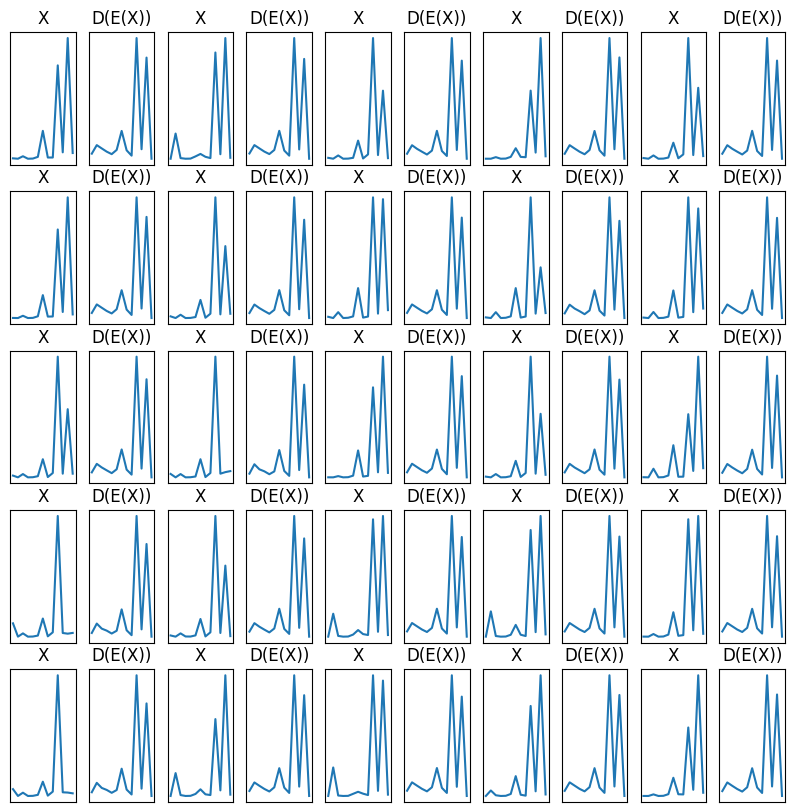

In [119]:
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,10,2*i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if parameters['1D data']:
      plt.plot(training_parameters['dataset'][i])
    else:
      plt.imshow(training_parameters['dataset'][i])
    plt.title("X")

    plt.subplot(5,10,2*i+2)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    _ = model.encoder(tf.expand_dims(training_parameters['dataset'][i], axis = 0))
    decoded_images = model.decoder(_)
    if parameters['1D data']:
      plt.plot(decoded_images[0])
    else:
      plt.imshow(decoded_images[0])
    plt.title("D(E(X))")
plt.show()

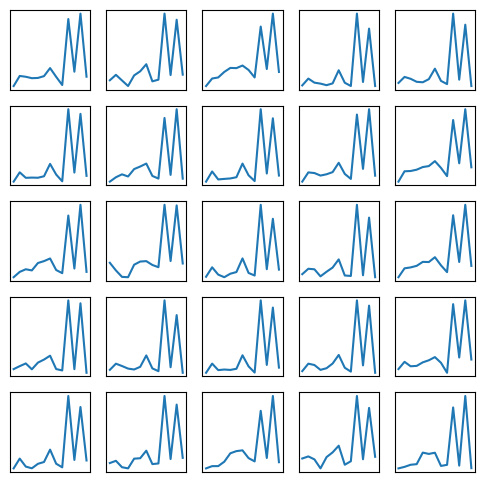

In [120]:
plt.figure(figsize=(6,6))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    img = model.decoder(tf.random.normal([1, parameters['latent_dim']]))
    if parameters['1D data']:
      plt.plot(img[0])
    else:
      plt.imshow(img[0])
plt.show()

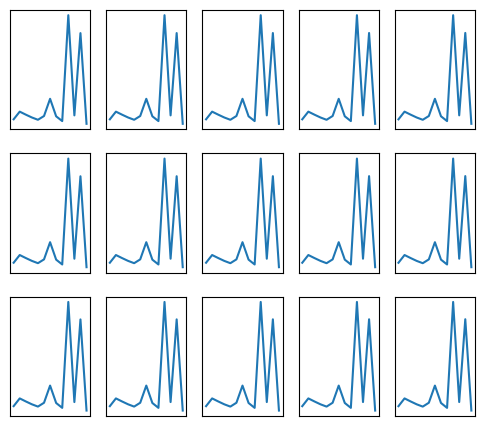

In [121]:
img0 = training_parameters['dataset'][21]
img0_encoded = model.encoder(tf.expand_dims(img0, axis = 0))

img1 = training_parameters['dataset'][24]
img1_encoded = model.encoder(tf.expand_dims(img1, axis = 0))

imgs = [model.decoder([(1-t)*img0_encoded + t*img1_encoded]) for t in np.linspace(0, 1, 15)]

plt.figure(figsize=(6,9))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    img = imgs[i]
    if parameters['1D data']:
      plt.plot(img[0])
    else:
      plt.imshow(img[0])
plt.show()